<a href="https://colab.research.google.com/github/Pejota021/Petshop/blob/main/Brasileirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests pandas pyspark matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as spark_sum, desc

In [3]:
spark = SparkSession.builder.appName('Brasileirao_BigData').getOrCreate()

In [4]:
top_passes = [
    {"jogador": "Junior Alonso", "passes": 2480},
    {"jogador": "André", "passes": 2348},
    {"jogador": "André", "passes": 2259},
    {"jogador": "Caio Alexandre", "passes": 2136},
    {"jogador": "Daniel Alves", "passes": 2056},
    {"jogador": "Allan", "passes": 2016},
    {"jogador": "Rever", "passes": 2005},
    {"jogador": "Fabricio Bruno", "passes": 1997},
    {"jogador": "Gabriel Xavier", "passes": 1977},
    {"jogador": "Joao Victor", "passes": 1915},
]

top_dribles = [
    {"jogador": "Michael", "dribles": 123},
    {"jogador": "Soteldo", "dribles": 120},
    {"jogador": "Keno", "dribles": 102},
    {"jogador": "Gerson", "dribles": 98},
    {"jogador": "Romarinho", "dribles": 94},
    {"jogador": "Everton Cebolinha", "dribles": 93},
    {"jogador": "Caio Paulista", "dribles": 93},
]

top_chute_gol = [
    {"jogador": "Cano", "chutes": 130},
    {"jogador": "Suárez", "chutes": 128},
    {"jogador": "Hulk", "chutes": 122},
    {"jogador": "Gabriel Barbosa", "chutes": 117},
    {"jogador": "Gustavo Scarpa", "chutes": 117},
    {"jogador": "Everaldo", "chutes": 115},
    {"jogador": "Hulk", "chutes": 112},
    {"jogador": "Yony Gonzalez", "chutes": 107},
    {"jogador": "Claudinho", "chutes": 105},
    {"jogador": "Vegetti", "chutes": 103},
]

top_jogador_faltas = [
    {"jogador": "Gregore", "faltas": 120},
    {"jogador": "Gregore", "faltas": 100},
    {"jogador": "Gregore", "faltas": 91},
    {"jogador": "Rodrigo Fernandez", "faltas": 84},
    {"jogador": "Manguinho", "faltas": 78},
    {"jogador": "Thiago Santos", "faltas": 77},
    {"jogador": "Aderlan", "faltas": 77},
    {"jogador": "Cléber", "faltas": 75},
    {"jogador": "Gerson", "faltas": 75},
    {"jogador": "Pepê", "faltas": 74},
]

In [5]:
spark_passes = spark.createDataFrame(top_passes)
spark_dribles = spark.createDataFrame(top_dribles)
spark_chutes = spark.createDataFrame(top_chute_gol)
spark_faltas = spark.createDataFrame(top_jogador_faltas)

In [6]:
print("=== DataFrame de Passes (Spark) ===")
spark_passes.show()

=== DataFrame de Passes (Spark) ===
+--------------+------+
|       jogador|passes|
+--------------+------+
| Junior Alonso|  2480|
|         André|  2348|
|         André|  2259|
|Caio Alexandre|  2136|
|  Daniel Alves|  2056|
|         Allan|  2016|
|         Rever|  2005|
|Fabricio Bruno|  1997|
|Gabriel Xavier|  1977|
|   Joao Victor|  1915|
+--------------+------+



In [16]:
top10_passes_spark = spark_passes.orderBy(col("passes").desc()).limit(10)
print("=== TOP 10 PASSES (Spark) ===")
top10_passes_spark.show()

=== TOP 10 PASSES (Spark) ===
+--------------+------+
|       jogador|passes|
+--------------+------+
| Junior Alonso|  2480|
|         André|  2348|
|         André|  2259|
|Caio Alexandre|  2136|
|  Daniel Alves|  2056|
|         Allan|  2016|
|         Rever|  2005|
|Fabricio Bruno|  1997|
|Gabriel Xavier|  1977|
|   Joao Victor|  1915|
+--------------+------+



In [8]:
media_passes = spark_passes.agg(avg("passes")).first()[0]
print(f"Média de passes (Spark): {media_passes:.2f}")

Média de passes (Spark): 2118.90


In [9]:
# 3. Jogadores com mais de 2100 passes
passes_acima_2100 = spark_passes.filter(col("passes") > 2100)
print("=== Jogadores com mais de 2100 passes ===")
passes_acima_2100.show()

=== Jogadores com mais de 2100 passes ===
+--------------+------+
|       jogador|passes|
+--------------+------+
| Junior Alonso|  2480|
|         André|  2348|
|         André|  2259|
|Caio Alexandre|  2136|
+--------------+------+



In [11]:
df_passes = spark_passes.toPandas()
df_dribles = spark_dribles.toPandas()
df_chute_gol = spark_chutes.toPandas()
df_jogador_faltas = spark_faltas.toPandas()

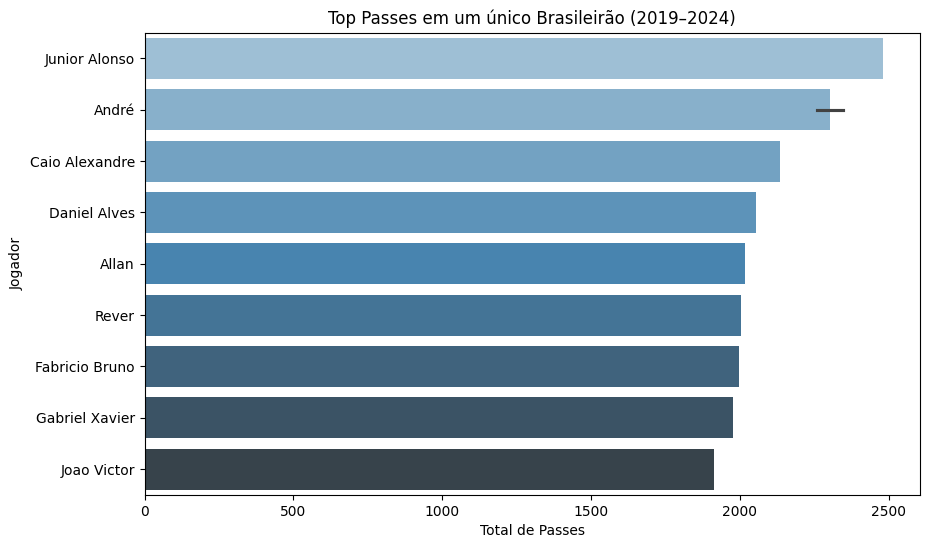

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_passes["jogador"], x=df_passes["passes"], palette="Blues_d", hue=df_passes["jogador"], legend=False)
plt.title("Top Passes em um único Brasileirão (2019–2024)")
plt.xlabel("Total de Passes")
plt.ylabel("Jogador")
plt.show()

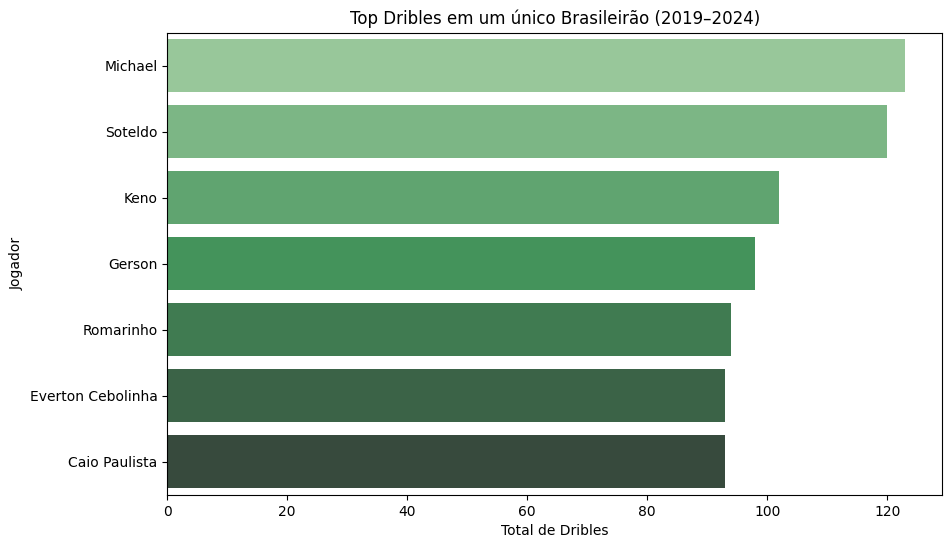

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_dribles["jogador"], x=df_dribles["dribles"], palette="Greens_d", hue=df_dribles["jogador"], legend=False)
plt.title("Top Dribles em um único Brasileirão (2019–2024)")
plt.xlabel("Total de Dribles")
plt.ylabel("Jogador")
plt.show()

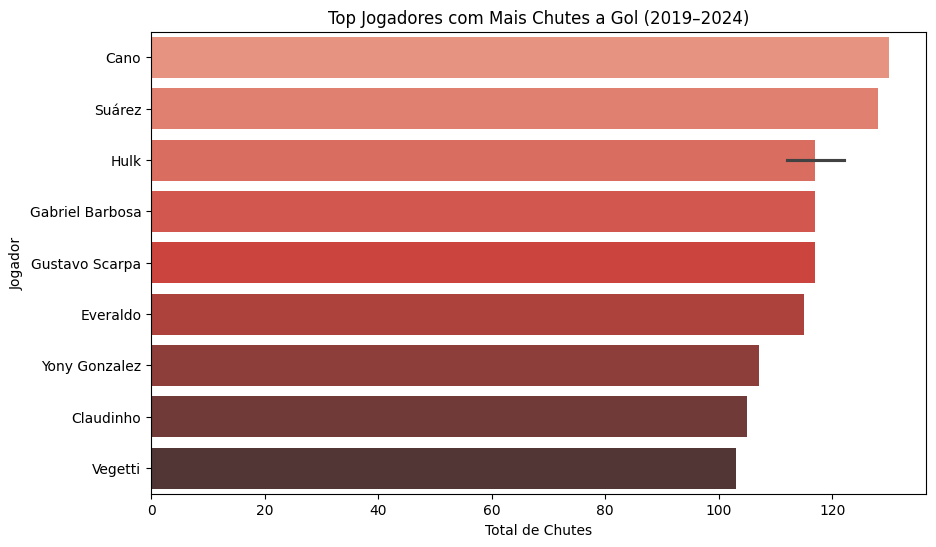

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_chute_gol["jogador"], x=df_chute_gol["chutes"], palette="Reds_d", hue=df_chute_gol["jogador"], legend=False)
plt.title("Top Jogadores com Mais Chutes a Gol (2019–2024)")
plt.xlabel("Total de Chutes")
plt.ylabel("Jogador")
plt.show()

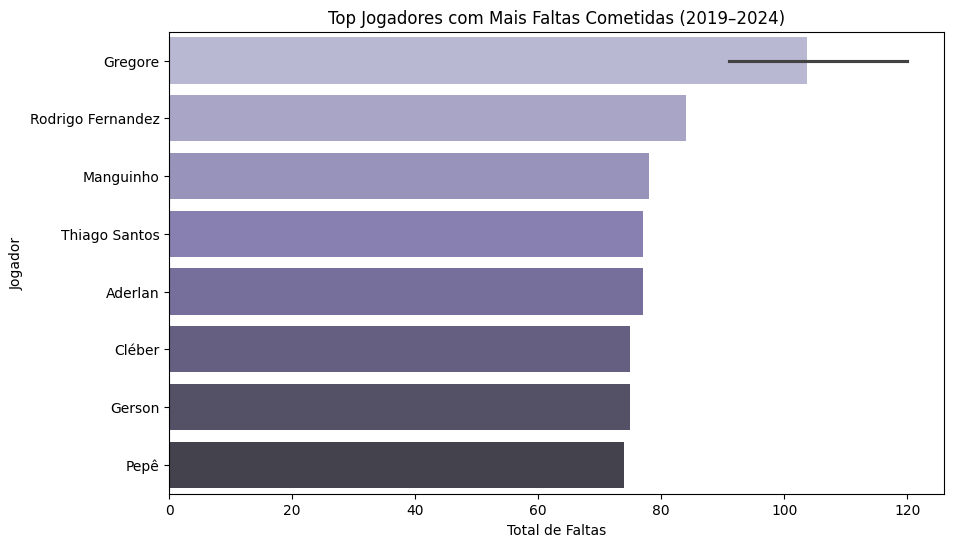

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_jogador_faltas["jogador"], x=df_jogador_faltas["faltas"], palette="Purples_d", hue=df_jogador_faltas["jogador"], legend=False)
plt.title("Top Jogadores com Mais Faltas Cometidas (2019–2024)")
plt.xlabel("Total de Faltas")
plt.ylabel("Jogador")
plt.show()